In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',None)
import seaborn as sns
import plotly.express as px
import clean

### Read in the data

In [2]:
raw = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0 )
raw.reset_index(inplace=True)

In [3]:
raw.head()

,index,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


### Test Train Split

In [4]:
from sklearn.model_selection import train_test_split

X = raw.drop('SalePrice', axis=1)
y = raw.SalePrice

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=7)

### Clean the data and deal with missingness
- see clean1.py for details
- turned quality and condition features into ordinal

In [5]:
Xtrain = clean.clean_missing(Xtrain.copy())
Xtest = clean.clean_missing(Xtest.copy())

### Removing outliers in GrLivArea (2 data points > 5 std ~3936)

In [6]:
threshold = (np.mean(Xtrain.GrLivArea) + 5*np.std(Xtrain.GrLivArea))
idx = Xtrain[Xtrain.GrLivArea > threshold].index
Xtrain.drop(idx, inplace=True)
ytrain.drop(idx, inplace=True)
Xtrain.drop('index', axis=1, inplace=True)

In [7]:
Xtrain.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
997,1728,90,RL,98.00000,13260,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3,3,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,2.0,0.0,2,0,6,2,3,10,Typ,0,0,None,1977.5,None,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,1,2010,Oth,Abnorml
381,1262,20,RL,80.00000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal
1077,1086,80,RL,85.00000,13400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,3,3,CBlock,3,3,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,3,Y,SBrkr,1086,0,0,1.0,0.0,1,0,3,1,3,6,Typ,1,4,Attchd,1966.0,RFn,2.0,484.0,3,3,Y,0,0,0,0,0,0,0,GdWo,None,0,6,2006,WD,Normal
416,2582,60,RL,74.00000,11002,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,No,GLQ,1048.0,Unf,0.0,341.0,1389.0,GasA,5,Y,SBrkr,1411,1171,0,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,1998.0,Fin,3.0,758.0,3,3,Y,286,60,0,0,0,0,0,None,None,0,1,2007,WD,Normal
1377,1652,20,RL,68.62847,22002,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1959,1991,Gable,CompShg,MetalSd,MetalSd,BrkFace,136.0,3,4,CBlock,3,3,Mn,ALQ,1386.0,Unf,0.0,206.0,1592.0,GasA,4,Y,SBrkr,1652,0,0,1.0,0.0,1,1,3,1,4,6,Typ,1,4,Attchd,1959.0,RFn,2.0,510.0,3,3,Y,0,0,0,0,201,0,0,None,None,0,7,2007,WD,Normal


### EDA -- need to fill in 
- want to show the trends for quality, see it has an effect on overall

In [8]:
ytrainlog = np.log(ytrain)
ytestlog = np.log(ytest)

In [ ]:
data_c1 = pd.concat([ytrain, Xtrain], axis=1)

In [ ]:
data_c1.head()

In [ ]:
data_c1.hist(bins=50, figsize=(20,15))

In [ ]:
data_c1[['SalePrice', 'Fireplaces']].boxplot(by = 'Fireplaces')

In [ ]:
data_c1.Fireplaces.value_counts()

### Feature Selection and Generation

# This is where we want to put neighborhood selection process


In [ ]:
data_c1[['SalePrice', 'SaleCondition']].boxplot(by = 'SaleCondition')

In [ ]:
# Will reduce to binary Partial Sale vs rest - see clean1.py
data_c1.SaleCondition.value_counts()

In [ ]:
data_c1[['SalePrice', 'PavedDrive']].boxplot(by = 'PavedDrive')

In [ ]:
# will group N(not paved) and P(partial) together and have binary paved or not feature
data_c1.PavedDrive.value_counts()

- Create feature TotalBath to add all half and full baths together
- Change YrBuilt YrSold and YrRemodAdd to HouseAge and RemodelAge
- Create HasDeck feature from WoodDeckSF feature
- Create Has Porch feature by adding all porch columns

In [ ]:
def cat_num_group(df):
    # Numerical Features
    num_features = df.select_dtypes(include=['int64','float64']).columns

    # Categorical Features
    cat_features = df.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = cat_num_group(data_c1)

In [ ]:
f = pd.melt(data_c1, id_vars=['SalePrice'], value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show()

### Second round of cleaning including feature engineering

In [9]:
Xtrain = clean.clean_category_var(Xtrain.copy())
Xtest = clean.clean_category_var(Xtest.copy())

In [10]:
Xtrain.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,MiscVal,1st2ndlogSF,HouseAge,RemodelAge,HasPool,HasFence,HasPorch,TotalBath,PartialSale
997,1,98.00000,13260,2,1,Tier_3,2,3,1,BrkFace,144.0,3,2,3,3,3,1728.0,3,Y,1,6,2,3,10,1,0,0,2,2,0.0,0.0,0,1,0,0,7.454720,48,9,0,0,0,4.0,0
381,1,80.00000,9600,1,1,Tier_1,2,1,1,None,0.0,3,2,4,1,3,1262.0,5,Y,1,3,1,3,6,1,1,3,1,2,2.0,460.0,3,1,298,0,7.140453,31,31,0,0,0,2.5,0
1077,1,85.00000,13400,1,1,Tier_3,2,1,3,BrkFace,1047.0,3,2,3,3,3,1024.0,3,Y,1,3,1,3,6,1,1,4,1,2,2.0,484.0,3,1,0,0,6.990257,40,40,0,1,0,2.0,0
416,1,74.00000,11002,2,1,Tier_2,2,1,2,None,0.0,4,1,4,3,1,1389.0,5,Y,1,4,1,4,9,1,1,3,1,1,3.0,758.0,3,1,286,0,7.856320,9,8,0,0,1,3.5,0
1377,1,68.62847,22002,1,1,Tier_3,2,1,1,BrkFace,136.0,3,2,3,3,3,1592.0,4,Y,1,3,1,4,6,1,1,4,1,2,2.0,510.0,3,1,0,0,7.409742,48,16,0,0,1,2.5,0


### Write csv to do stepwise BIC in R

In [33]:
rdata1 = pd.concat([Xtrain, ytrainlog], axis=1)

In [12]:
rdata1.to_csv("./data/rdata1.csv",index_label = False)

In [13]:
rdata1.shape

(2062, 44)

### Dummify the categorical Variables

In [14]:
Xtrain_d = pd.get_dummies(Xtrain, drop_first=True)
Xtest_d = pd.get_dummies(Xtest, drop_first=True)

In [15]:
Xtrain_d.head()

,LotFrontage,LotArea,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,MiscVal,1st2ndlogSF,HouseAge,RemodelAge,HasPool,HasFence,HasPorch,TotalBath,PartialSale,MSZoning_2,LotShape_2,LandSlope_2,Neighborhood_Tier_2,Neighborhood_Tier_3,Condition1_2,BldgType_2,BldgType_3,HouseStyle_2,HouseStyle_3,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_2,BsmtExposure_2,BsmtExposure_3,BsmtFinType1_2,BsmtFinType1_3,CentralAir_Y,Electrical_2,Functional_2,GarageType_2,GarageFinish_2
997,98.00000,13260,144.0,3,3,1728.0,3,6,2,3,10,0,0,0.0,0.0,0,1,0,0,7.454720,48,9,0,0,0,4.0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1
381,80.00000,9600,0.0,3,4,1262.0,5,3,1,3,6,1,3,2.0,460.0,3,1,298,0,7.140453,31,31,0,0,0,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1
1077,85.00000,13400,1047.0,3,3,1024.0,3,3,1,3,6,1,4,2.0,484.0,3,1,0,0,6.990257,40,40,0,1,0,2.0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1
416,74.00000,11002,0.0,4,4,1389.0,5,4,1,4,9,1,3,3.0,758.0,3,1,286,0,7.856320,9,8,0,0,1,3.5,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1377,68.62847,22002,136.0,3,3,1592.0,4,3,1,4,6,1,4,2.0,510.0,3,1,0,0,7.409742,48,16,0,0,1,2.5,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1


### Lasso for feature selection to compare

In [16]:
from sklearn.linear_model import Lasso
lasso1 = Lasso(normalize=True)

In [17]:
# Grid search to get best alpha
from sklearn.model_selection import GridSearchCV
grid_param = [{'alpha': list(np.linspace(1e-4, 100, 100))}] # key of dictionary is parameter, value is range of values of hyperparameter
grid = GridSearchCV(estimator=lasso1, param_grid=grid_param, cv=5, return_train_score=True,)
grid.fit(Xtrain_d, ytrainlog)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 1.0102, 2.0203, 3.0304, 4.0405,
                                    5.050599999999999, 6.0607, 7.0708, 8.0809,
                                    9.091, 10.101099999999999, 11.1112, 12.1213,
                                    13.1314, 14.1415, 15.1516, 16.1617, 17.1718,
                                    18.1819, 19.192, 20.202099999999998,
                                    21.2122, 22.2223, 23.2324, 24.2425, 25.2526,
                                    26.2627, 27.2728, 28.2829, 29.293, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,


In [18]:
grid.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
lasso2 = Lasso(normalize=True, alpha=0.0001)
lasso2.fit(Xtrain_d, ytrainlog) # fit data

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Plot Lasso coeficients

Text(0.5, 1.0, 'Feature importance using Lasso Model')

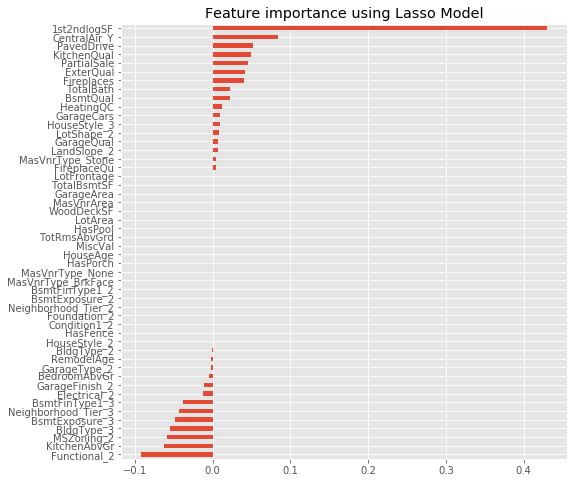

In [20]:
coef = pd.Series(lasso2.coef_, index = Xtrain_d.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### Using Both Forward BIC and Lasso make most interpretable model

In [22]:
# Chosen 
column_names = ['ExterQual','BsmtQual','KitchenQual',
                'Fireplaces','GarageQual','PavedDrive','TotalBath',
                'PartialSale','TotalBsmtSF','1st2ndlogSF','GarageArea','WoodDeckSF']
Xtrain_m = Xtrain_d[column_names].copy()
Xtest_m = Xtest_d[column_names].copy()

In [23]:
import statsmodels.api as sm
x_m = sm.add_constant(Xtrain_m)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(ytrain, x_m)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     809.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:23:45   Log-Likelihood:                -24219.
No. Observations:                2062   AIC:                         4.846e+04
Df Residuals:                    2049   BIC:                         4.854e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.838e+05   2.03e+04    -23.863      

### Cross Validate and check the train - test scores

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain_m, ytrainlog)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
from sklearn.model_selection import cross_val_score
cv3_train=(cross_val_score(lm, Xtrain_m, ytrainlog))

In [26]:
cv3_train

array([0.84580489, 0.8507651 , 0.86420551])

In [27]:
print(f'Mean CV Score: {np.mean(cv3_train)}')
print(f'CV Score Std: {np.std(cv3_train)}')

Mean CV Score: 0.8535918344931201
CV Score Std: 0.007773394238789221


In [28]:
lm.score(Xtrain_m, ytrainlog)

0.85655722272963

In [29]:
lm.score(Xtest_m, ytestlog)

0.8221858145013445

### Look at the coefficients

In [32]:
pd.Series(lm.coef_ ,index = Xtrain_m.columns).sort_values(ascending =False)

1st2ndlogSF    0.378522
PavedDrive     0.113658
ExterQual      0.092561
KitchenQual    0.092210
PartialSale    0.077431
Fireplaces     0.071786
TotalBath      0.047483
BsmtQual       0.043430
GarageQual     0.018951
GarageArea     0.000229
TotalBsmtSF    0.000143
WoodDeckSF     0.000114
dtype: float64

### Profit/Cost for Renovation Graphs

In [40]:
pc = pd.read_csv('data/pc_renovation.csv')
pc

,Feature,Increase in log House Price,Renovation Costs in Thousands,Notes
0,Basement Tot Ren,0.043430,18.395,Average cost renovate basement
1,Basement Partial,0.043430,4.610,Average cost of just installing flooring and c...
2,Kitchen Tot Ren,0.092210,12.200,Average cost hire designer (not remodel)
3,Kitchen Partial,0.092210,6.215,Average cost installing countertops and flooring
4,Fireplace,0.071786,2.331,Average cost to build a fireplace
5,Garage,0.018951,12.800,Average cost to convert or renovate garage
6,Driveway,0.113658,4.620,Average cost paving driveway.
7,Bathroom,0.047483,15.000,Average cost to build a bathroom
8,Deck,0.036480,7.652,Deck coefficient is 0.000114 mult by 320 the a...


In [42]:
pc['Log Profit/Cost in Thousands'] = pc['Increase in log House Price']/pc['Renovation Costs in Thousands']

In [43]:
pc

,Feature,Increase in log House Price,Renovation Costs in Thousands,Notes,Log Profit/Cost in Thousands
0,Basement Tot Ren,0.043430,18.395,Average cost renovate basement,0.002361
1,Basement Partial,0.043430,4.610,Average cost of just installing flooring and c...,0.009421
2,Kitchen Tot Ren,0.092210,12.200,Average cost hire designer (not remodel),0.007558
3,Kitchen Partial,0.092210,6.215,Average cost installing countertops and flooring,0.014837
4,Fireplace,0.071786,2.331,Average cost to build a fireplace,0.030796
5,Garage,0.018951,12.800,Average cost to convert or renovate garage,0.001481
6,Driveway,0.113658,4.620,Average cost paving driveway.,0.024601
7,Bathroom,0.047483,15.000,Average cost to build a bathroom,0.003166
8,Deck,0.036480,7.652,Deck coefficient is 0.000114 mult by 320 the a...,0.004767


In [46]:
import plotly.express as px
fig = px.scatter(pc, x="Increase in log House Price", y="Renovation Costs in Thousands",
                 text='Feature', title = 'Title', color='Log Profit/Cost in Thousands')
fig.update_traces(textposition='top center')
# fig.update_xaxes(range=[0,20000])
# fig.update_yaxes(range=[0, 20000])

fig.show()

In [49]:
fig = px.bar(pc, x="Feature", y='Log Profit/Cost in Thousands',
                 title = 'Title')

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Fireplace','Driveway',
                                                                   'Kitchen Partial',
                                                                   'Basement Partial',
                                                                   'Kitchen Tot Ren','Deck',
                                                                   'Bathroom','Basement Tot Ren']})
fig.show()